In [32]:
from pyscf import gto, scf
#import os
import numpy as np
from matplotlib import pyplot as plt

d1 = 5
atom1 = f'''
H 0 0 0
H {d1} 0 0
'''

mol1 = gto.Mole(
verbose=3,
atom=atom1,
basis='sto-6g',
)

mol1.build()
mf1 = scf.RHF(mol1).density_fit()
mf1.kernel()

d2 = 6
atom2 = f'''
H 0 0 0
H {d2} 0 0
'''

mol2 = gto.Mole(
verbose=3,
atom=atom2,
basis='sto-6g',
)

mol2.build()
mf2 = scf.RHF(mol2).density_fit()
mf2.kernel()

print('the rhf energy difference is: ',mf1.e_tot-mf2.e_tot)


WARN: Even tempered Gaussians are generated as DF auxbasis for  H

converged SCF energy = -0.624498144373364

WARN: Even tempered Gaussians are generated as DF auxbasis for  H

converged SCF energy = -0.608011113059654
the rhf energy difference is:  -0.016487031313709655


In [33]:
from ad_afqmc import pyscf_interface, driver, mpi_jax

mo_file1="mo1.npz"
amp_file1="amp1.npz"
chol_file1="chol1"
pyscf_interface.prep_afqmc(mf1,mo_file=mo_file1,amp_file=amp_file1,chol_file=chol_file1)
mo_file2="mo2.npz"
amp_file2="amp2.npz"
chol_file2="chol2"
pyscf_interface.prep_afqmc(mf2,mo_file=mo_file2,amp_file=amp_file2,chol_file=chol_file2)

#
# Preparing AFQMC calculation
# Calculating Cholesky integrals
# Decomposing ERI with DF
# Finished calculating Cholesky integrals
#
# Size of the correlation space:
# Number of electrons: (1, 1)
# Number of basis functions: 2
# Number of Cholesky vectors: 18
#
#
# Preparing AFQMC calculation
# Calculating Cholesky integrals
# Decomposing ERI with DF
# Finished calculating Cholesky integrals
#
# Size of the correlation space:
# Number of electrons: (1, 1)
# Number of basis functions: 2
# Number of Cholesky vectors: 18
#


In [34]:
from functools import partial
from typing import List, Optional, Union

#import jax
import jax.numpy as jnp
import numpy as np
#from jax import dtypes, jvp, random, vjp

from ad_afqmc import sampling

print = partial(print, flush=True)

options1 = {
    "dt": 0.005,
    "n_eql": 4,
    "n_ene_blocks": 1,
    "n_sr_blocks": 10,
    "n_blocks": 200,
    "n_walkers": 50,
    "seed": 98,
    "walker_type": "rhf",
    "trial": "rhf",
}

options2 = {
    "dt": 0.005,
    "n_eql": 4,
    "n_ene_blocks": 1,
    "n_sr_blocks": 10,
    "n_blocks": 200,
    "n_walkers": 50,
    "seed": 2,
    "walker_type": "rhf",
    "trial": "rhf",
}

In [35]:
afqmc1 = (mpi_jax._prep_afqmc(options1,mo_file=mo_file1,amp_file=amp_file1,chol_file=chol_file1))
e_afqmc1, err_afqmc1 = driver.afqmc(*afqmc1)

# Number of MPI ranks: 1
#
# norb: 2
# nelec: (1, 1)
#
# dt: 0.005
# n_eql: 4
# n_ene_blocks: 1
# n_sr_blocks: 10
# n_blocks: 200
# n_walkers: 50
# seed: 98
# walker_type: rhf
# trial: rhf
# n_prop_steps: 50
# orbital_rotation: True
# do_sr: True
# symmetry: False
# save_walkers: False
# ene0: 0.0
# free_projection: False
# n_batch: 1
# LNO: False
# orbE: 0
# maxError: 0.001
#
# Equilibration sweeps:
#   Iter        Block energy      Walltime
#     0      -6.244981444e-01     7.10e-01 
#     1      -7.402809858e-01     2.56e+00 
#     2      -8.119956851e-01     4.11e+00 
#     3      -7.485436797e-01     4.26e+00 
#     4      -7.483158112e-01     4.41e+00 
#
# Sampling sweeps:
#  Iter        Mean energy          Stochastic error       Walltime
     0      -7.746896744e-01                -              5.85e+00 
    20      -7.709728999e-01        1.317588646e-02        6.53e+00 
    40      -7.632760778e-01        7.477195014e-03        7.23e+00 
    60      -7.713201901e-01        1

In [36]:
afqmc2 = (mpi_jax._prep_afqmc(options2,mo_file=mo_file2,amp_file=amp_file2,chol_file=chol_file2))
e_afqmc2, err_afqmc2 = driver.afqmc(*afqmc2)

# Number of MPI ranks: 1
#
# norb: 2
# nelec: (1, 1)
#
# dt: 0.005
# n_eql: 4
# n_ene_blocks: 1
# n_sr_blocks: 10
# n_blocks: 200
# n_walkers: 50
# seed: 2
# walker_type: rhf
# trial: rhf
# n_prop_steps: 50
# orbital_rotation: True
# do_sr: True
# symmetry: False
# save_walkers: False
# ene0: 0.0
# free_projection: False
# n_batch: 1
# LNO: False
# orbE: 0
# maxError: 0.001
#
# Equilibration sweeps:
#   Iter        Block energy      Walltime
#     0      -6.080111131e-01     2.19e-01 
#     1      -7.380653620e-01     3.84e-01 
#     2      -7.712720633e-01     5.44e-01 
#     3      -7.426878810e-01     7.02e-01 
#     4      -7.854155898e-01     8.59e-01 
#
# Sampling sweeps:
#  Iter        Mean energy          Stochastic error       Walltime
     0      -7.446510196e-01                -              8.95e-01 
    20      -7.670516398e-01        9.860400059e-03        1.59e+00 
    40      -7.586473402e-01        6.613034836e-03        2.29e+00 
    60      -7.586022043e-01        6.

In [38]:
afqmc_en_diff = e_afqmc1 - e_afqmc2
afqmc_en_diff_err = np.sqrt(err_afqmc1**2+err_afqmc2**2)
print(f'the afqmc energy difference is {afqmc_en_diff}, error is {afqmc_en_diff_err}')

the afqmc energy difference is -0.00266004499024719, error is 0.004380065817394061


In [28]:
from dataclasses import dataclass
from functools import partial
from typing import Any, Tuple

import jax
import jax.numpy as jnp
from jax import checkpoint, jit, lax, random

from ad_afqmc import linalg_utils
from ad_afqmc.hamiltonian import hamiltonian
from ad_afqmc.propagation import propagator
from ad_afqmc.wavefunctions import wave_function

sampler_eq = sampling.sampler(n_prop_steps=50, n_ene_blocks=5, n_sr_blocks=10)

def init_prop(ham_data, ham, prop, trial, wave_data, options, MPI):
    comm = MPI.COMM_WORLD
    #size = comm.Get_size()
    rank = comm.Get_rank()
    seed = options["seed"]
    #neql = options["n_eql"]
    init_walkers: Optional[Union[List, jax.Array]] = None
    trial_rdm1 = trial.get_rdm1(wave_data)
    if "rdm1" not in wave_data:
        wave_data["rdm1"] = trial_rdm1
    ham_data = ham.build_measurement_intermediates(ham_data, trial, wave_data)
    ham_data = ham.build_propagation_intermediates(ham_data, prop, trial, wave_data)
    prop_data = prop.init_prop_data(trial, wave_data, ham_data, init_walkers)
    prop_data["key"] = random.PRNGKey(seed + rank)
    prop_data["n_killed_walkers"] = 0
    print(f"# initial energy: {prop_data['e_estimate']:.9e}")
    
    return prop_data, ham_data

def en_samples(prop_data,ham_data,prop,trial,wave_data):
    energy_samples = jnp.real(
        trial.calc_energy(prop_data["walkers"], ham_data, wave_data)
    )
    energy_samples = jnp.where(
        jnp.abs(energy_samples - prop_data["e_estimate"]) > jnp.sqrt(2.0 / prop.dt),
        prop_data["e_estimate"],
        energy_samples,
    )
    return energy_samples

def block_en_weight(prop_data,ham_data,prop,trial,wave_data):

    energy_samples = en_samples(prop_data,ham_data,prop,wave_data,trial)

    block_weight = jnp.sum(prop_data["weights"])
    block_energy = jnp.sum(energy_samples * prop_data["weights"]) / block_weight
    return block_energy, block_weight

def field_block_scan(
        prop_data: dict,
        fields,
        ham_data: dict,
        prop: propagator,
        trial: wave_function,
        wave_data: dict,
        ) -> Tuple[dict, Tuple[jax.Array, jax.Array]]:
    """Block scan function for a given field"""
    _step_scan_wrapper = lambda x, y: sampler_eq._step_scan(
        x, y, ham_data, prop, trial, wave_data
    )
    prop_data, _ = lax.scan(_step_scan_wrapper, prop_data, fields)
    prop_data["n_killed_walkers"] += prop_data["weights"].size - jnp.count_nonzero(
        prop_data["weights"]
    )
    prop_data = prop.orthonormalize_walkers(prop_data)
    prop_data["overlaps"] = trial.calc_overlap(prop_data["walkers"], wave_data)

    block_energy,_ = block_en_weight(prop_data,ham_data,prop,wave_data,trial)
    prop_data["pop_control_ene_shift"] = (
        0.9 * prop_data["pop_control_ene_shift"] + 0.1 * block_energy
    )
    return prop_data

def cs_block_scan(
        prop_data1: dict,
        ham_data1: dict,
        prop1: propagator,
        trial1: wave_function,
        wave_data1: dict,
        prop_data2: dict,
        ham_data2: dict,
        prop2: propagator,
        trial2: wave_function,
        wave_data2: dict):
    '''correlated sampling of two blocks over the same field'''
    prop_data1["key"], subkey1 = random.split(prop_data1["key"])
    fields = random.normal(
        subkey1,
        shape=(
            sampler_eq.n_prop_steps,
            prop1.n_walkers,
            ham_data1["chol"].shape[0],
        )
    )
    prop_data1 = field_block_scan(prop_data1,fields,ham_data1,prop1,trial1,wave_data1)
    prop_data2 = field_block_scan(prop_data2,fields,ham_data2,prop2,trial2,wave_data2)

    return prop_data1, prop_data2, fields

def ucs_block_scan(
        prop_data1: dict,
        ham_data1: dict,
        prop1: propagator,
        trial1: wave_function,
        wave_data1: dict,
        prop_data2: dict,
        ham_data2: dict,
        prop2: propagator,
        trial2: wave_function,
        wave_data2: dict):
    '''correlated sampling of two blocks over the same field'''
    prop_data1["key"], subkey1 = random.split(prop_data1["key"])
    fields1 = random.normal(
        subkey1,
        shape=(
            sampler_eq.n_prop_steps,
            prop1.n_walkers,
            ham_data1["chol"].shape[0],
        )
    )
    prop_data1 = field_block_scan(prop_data1,fields1,ham_data1,prop1,trial1,wave_data1)

    prop_data2["key"], subkey2 = random.split(prop_data2["key"])
    fields2 = random.normal(
        subkey2,
        shape=(
            sampler_eq.n_prop_steps,
            prop2.n_walkers,
            ham_data2["chol"].shape[0],
        )
    )
    prop_data2 = field_block_scan(prop_data2,fields2,ham_data2,prop2,trial2,wave_data2)

    return prop_data1, prop_data2, fields1, fields2

In [13]:
ham_data1, ham1, prop1, trial1, wave_data1, sampler1, observable1, options1, MPI \
    = mpi_jax._prep_afqmc(options1,mo_file=mo_file1,amp_file=amp_file1,chol_file=chol_file1)
ham_data2, ham2, prop2, trial2, wave_data2, sampler2, observable2, options2, MPI \
    = mpi_jax._prep_afqmc(options2,mo_file=mo_file2,amp_file=amp_file2,chol_file=chol_file2)

prop_data1, ham_data1 = init_prop(ham_data1, ham1, prop1, trial1, wave_data1, options1, MPI)
prop_data2, ham_data2 = init_prop(ham_data2, ham2, prop2, trial2, wave_data2, options2, MPI)

# comm = MPI.COMM_WORLD
# size = comm.Get_size()
# rank = comm.Get_rank()
# seed1 = options1["seed"]
# seed2 = options2["seed"]
# neql1 = options1["n_eql"]
# neql2 = options2["n_eql"]
# init_walkers: Optional[Union[List, jax.Array]] = None
# ham_data1 = ham1.build_measurement_intermediates(ham_data1, trial1, wave_data1)
# ham_data1 = ham1.build_propagation_intermediates(ham_data1, prop1, trial1, wave_data1)
# prop_data1 = prop1.init_prop_data(trial1, wave_data1, ham_data1, init_walkers)
# prop_data1["key"] = random.PRNGKey(seed1 + rank)
# ham_data2 = ham2.build_measurement_intermediates(ham_data2, trial2, wave_data2)
# ham_data2 = ham2.build_propagation_intermediates(ham_data2, prop2, trial2, wave_data2)
# prop_data2 = prop2.init_prop_data(trial2, wave_data2, ham_data2, init_walkers)
# prop_data2["key"] = random.PRNGKey(seed2 + rank)

n_iter = 0

# Number of MPI ranks: 1
#
# norb: 2
# nelec: (1, 1)
#
# dt: 0.003
# n_eql: 8
# n_ene_blocks: 1
# n_sr_blocks: 10
# n_blocks: 400
# n_walkers: 200
# seed: 98
# walker_type: rhf
# trial: rhf
# n_prop_steps: 50
# orbital_rotation: True
# do_sr: True
# symmetry: False
# save_walkers: False
# ene0: 0.0
# free_projection: False
# n_batch: 1
# LNO: False
# orbE: 0
# maxError: 0.001
#
# Number of MPI ranks: 1
#
# norb: 2
# nelec: (1, 1)
#
# dt: 0.003
# n_eql: 8
# n_ene_blocks: 1
# n_sr_blocks: 10
# n_blocks: 400
# n_walkers: 200
# seed: 2
# walker_type: rhf
# trial: rhf
# n_prop_steps: 50
# orbital_rotation: True
# do_sr: True
# symmetry: False
# save_walkers: False
# ene0: 0.0
# free_projection: False
# n_batch: 1
# LNO: False
# orbE: 0
# maxError: 0.001
#
# initial energy: -7.935400855e-01
# initial energy: -1.935384558e-01


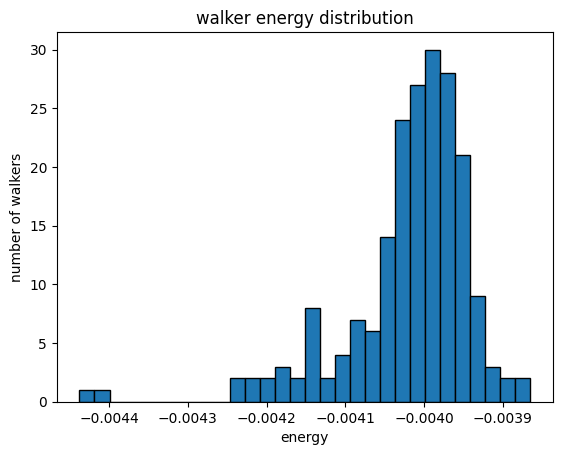

the standard devrivation is 8.038138546534291e-05


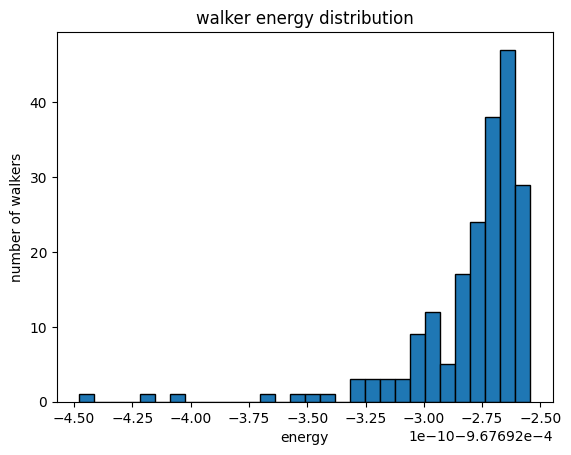

the standard devrivation is 2.65659969973377e-11


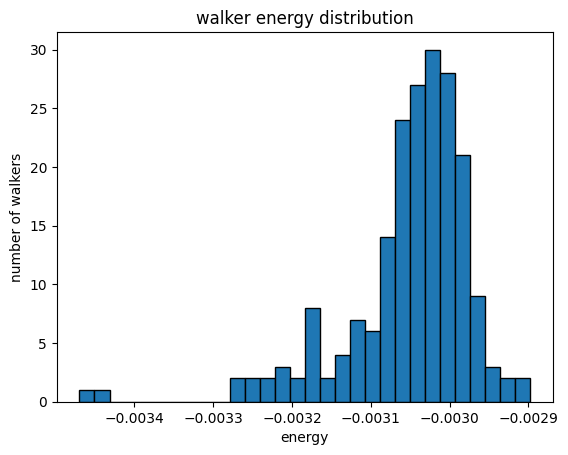

iteration 1
random field [-1.46832121  0.39105561  0.51450083 -0.34597995 -0.69041112  0.23772648
 -0.64337748 -1.93961613 -0.31344856 -1.16002994  0.08314578  0.88856035
 -0.64645748  0.75104184 -1.46330852  1.03683873  0.94798998  0.89536052]
sample1 energy is -0.8037781540390164
sample2 energy is -0.1935384558341912
correlated sampling afqmc energy difference is:  -0.610239698204825
the standard devrivation is 8.038138599855136e-05


In [14]:
n_iter += 1

prop_data1,prop_data2,fields = cs_block_scan(prop_data1,ham_data1,prop1,trial1,wave_data1,prop_data2,ham_data2,prop2,trial2,wave_data2)
energy_samples1 = en_samples(prop_data1,ham_data1,prop1,trial1,wave_data1)
energy_samples2 = en_samples(prop_data2,ham_data2,prop2,trial2,wave_data2)
norm_weight1 = prop_data1["weights"]/jnp.sum(prop_data1["weights"])
norm_weight2 = prop_data2["weights"]/jnp.sum(prop_data2["weights"])
weight_walker_en1 = energy_samples1*norm_weight1
weight_walker_en2 = energy_samples2*norm_weight2
weight_walker_en_diff = weight_walker_en1 - weight_walker_en2

from matplotlib import pyplot as plt

plt.hist(weight_walker_en1, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()
print(f'the standard devrivation is {weight_walker_en1.std()}')

plt.hist(weight_walker_en2, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()
print(f'the standard devrivation is {weight_walker_en2.std()}')

plt.hist(weight_walker_en_diff, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()

print(f'iteration {n_iter}')
print(f'random field {fields[0,0]}')
print(f'sample1 energy is {sum(weight_walker_en1)}')
print(f'sample2 energy is {sum(weight_walker_en2)}')
print('correlated sampling afqmc energy difference is: ',sum(weight_walker_en_diff))
print(f'the standard devrivation is {weight_walker_en_diff.std()}')

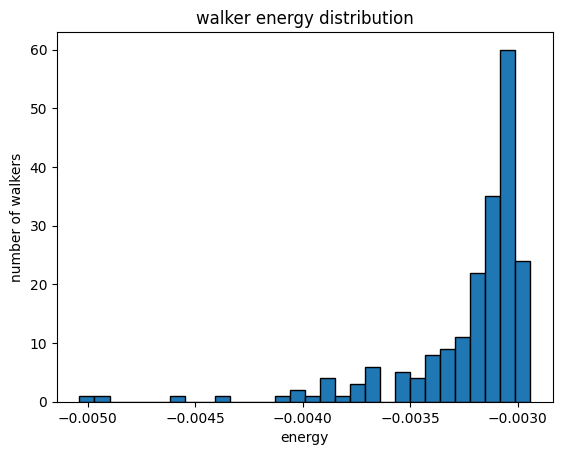

the standard devrivation is 0.00032380619312427547


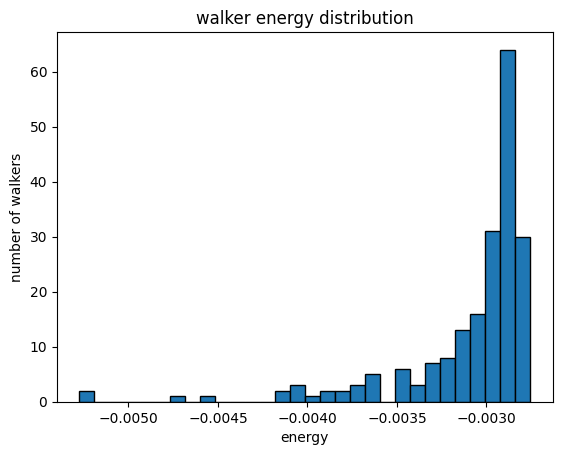

the standard devrivation is 0.00040219095401521185


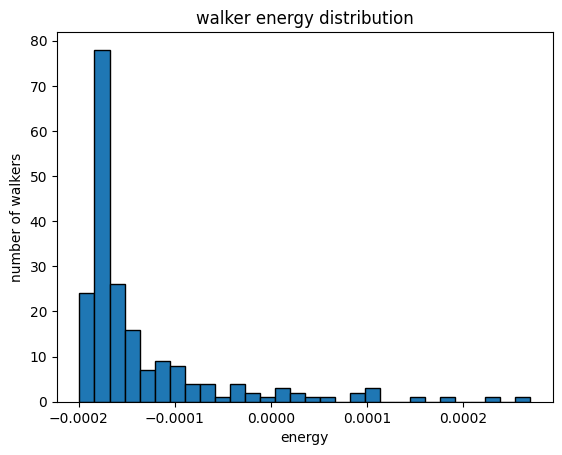

iteration 2
random field [-1.62529483  1.58623192]
sample1 energy is -0.6455840959718451
sample2 energy is -0.6187542694693808
correlated sampling afqmc energy difference is:  -0.02682982650246455
the standard devrivation is 8.0968686704864e-05


In [9]:
n_iter += 1

prop_data1,prop_data2,fields = cs_block_scan(prop_data1,ham_data1,prop1,trial1,wave_data1,prop_data2,ham_data2,prop2,trial2,wave_data2)
energy_samples1 = en_samples(prop_data1,ham_data1,prop1,trial1,wave_data1)
energy_samples2 = en_samples(prop_data2,ham_data2,prop2,trial2,wave_data2)
norm_weight1 = prop_data1["weights"]/jnp.sum(prop_data1["weights"])
norm_weight2 = prop_data2["weights"]/jnp.sum(prop_data2["weights"])
weight_walker_en1 = energy_samples1*norm_weight1
weight_walker_en2 = energy_samples2*norm_weight2
weight_walker_en_diff = weight_walker_en1 - weight_walker_en2

from matplotlib import pyplot as plt

plt.hist(weight_walker_en1, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()
print(f'the standard devrivation is {weight_walker_en1.std()}')

plt.hist(weight_walker_en2, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()
print(f'the standard devrivation is {weight_walker_en2.std()}')

plt.hist(weight_walker_en_diff, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()

print(f'iteration {n_iter}')
print(f'random field {fields[0,0]}')
print(f'sample1 energy is {sum(weight_walker_en1)}')
print(f'sample2 energy is {sum(weight_walker_en2)}')
print('correlated sampling afqmc energy difference is: ',sum(weight_walker_en_diff))
print(f'the standard devrivation is {weight_walker_en_diff.std()}')

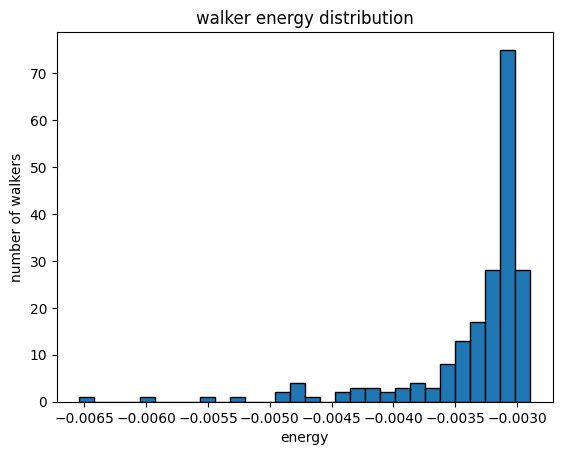

the standard devrivation is 0.0005541468068184896


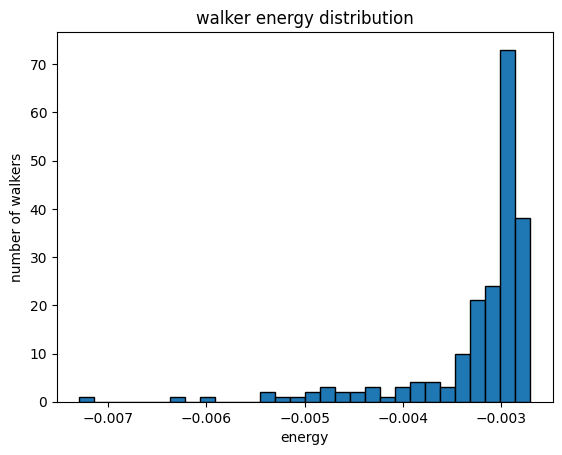

the standard devrivation is 0.0006849947107538942


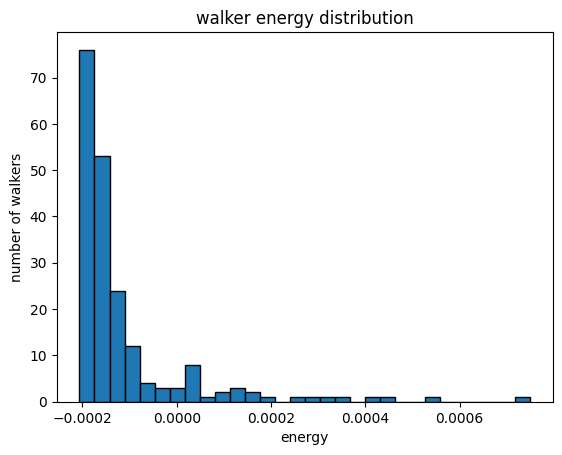

iteration 3
random field [ 0.18025531 -0.87749889]
sample1 energy is -0.6697865931847913
sample2 energy is -0.6476307048788511
correlated sampling afqmc energy difference is:  -0.022155888305940365
the standard devrivation is 0.00013810869502540294


In [10]:
n_iter += 1

prop_data1,prop_data2,fields = cs_block_scan(prop_data1,ham_data1,prop1,trial1,wave_data1,prop_data2,ham_data2,prop2,trial2,wave_data2)
energy_samples1 = en_samples(prop_data1,ham_data1,prop1,trial1,wave_data1)
energy_samples2 = en_samples(prop_data2,ham_data2,prop2,trial2,wave_data2)
norm_weight1 = prop_data1["weights"]/jnp.sum(prop_data1["weights"])
norm_weight2 = prop_data2["weights"]/jnp.sum(prop_data2["weights"])
weight_walker_en1 = energy_samples1*norm_weight1
weight_walker_en2 = energy_samples2*norm_weight2
weight_walker_en_diff = weight_walker_en1 - weight_walker_en2

from matplotlib import pyplot as plt

plt.hist(weight_walker_en1, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()
print(f'the standard devrivation is {weight_walker_en1.std()}')

plt.hist(weight_walker_en2, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()
print(f'the standard devrivation is {weight_walker_en2.std()}')

plt.hist(weight_walker_en_diff, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()

print(f'iteration {n_iter}')
print(f'random field {fields[0,0]}')
print(f'sample1 energy is {sum(weight_walker_en1)}')
print(f'sample2 energy is {sum(weight_walker_en2)}')
print('correlated sampling afqmc energy difference is: ',sum(weight_walker_en_diff))
print(f'the standard devrivation is {weight_walker_en_diff.std()}')

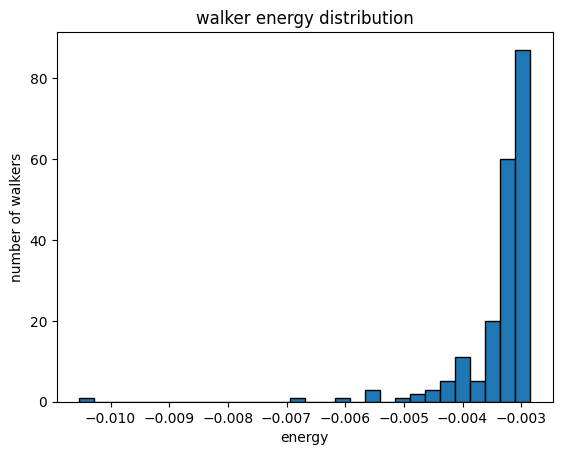

the standard devrivation is 0.0007717969975632735


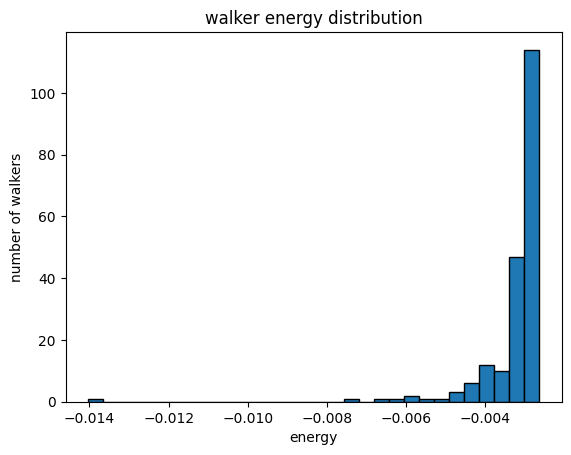

the standard devrivation is 0.0010330865109686937


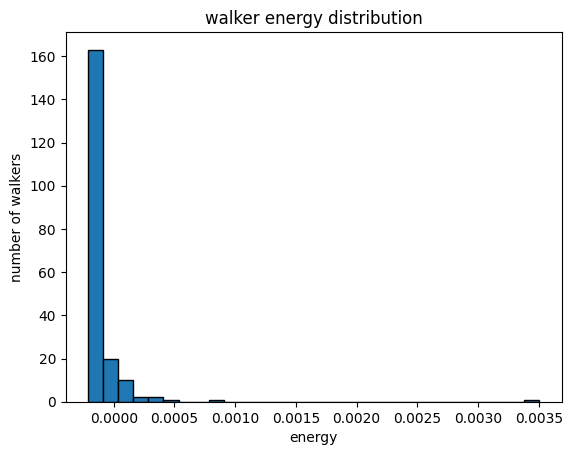

iteration 4
random field [-0.67848295 -0.26216265]
sample1 energy is -0.6765970865896738
sample2 energy is -0.6560152343083895
correlated sampling afqmc energy difference is:  -0.02058185228128394
the standard devrivation is 0.0002857125291859619


In [11]:
n_iter += 1

prop_data1,prop_data2,fields = cs_block_scan(prop_data1,ham_data1,prop1,trial1,wave_data1,prop_data2,ham_data2,prop2,trial2,wave_data2)
energy_samples1 = en_samples(prop_data1,ham_data1,prop1,trial1,wave_data1)
energy_samples2 = en_samples(prop_data2,ham_data2,prop2,trial2,wave_data2)
norm_weight1 = prop_data1["weights"]/jnp.sum(prop_data1["weights"])
norm_weight2 = prop_data2["weights"]/jnp.sum(prop_data2["weights"])
weight_walker_en1 = energy_samples1*norm_weight1
weight_walker_en2 = energy_samples2*norm_weight2
weight_walker_en_diff = weight_walker_en1 - weight_walker_en2

from matplotlib import pyplot as plt

plt.hist(weight_walker_en1, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()
print(f'the standard devrivation is {weight_walker_en1.std()}')

plt.hist(weight_walker_en2, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()
print(f'the standard devrivation is {weight_walker_en2.std()}')

plt.hist(weight_walker_en_diff, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()

print(f'iteration {n_iter}')
print(f'random field {fields[0,0]}')
print(f'sample1 energy is {sum(weight_walker_en1)}')
print(f'sample2 energy is {sum(weight_walker_en2)}')
print('correlated sampling afqmc energy difference is: ',sum(weight_walker_en_diff))
print(f'the standard devrivation is {weight_walker_en_diff.std()}')

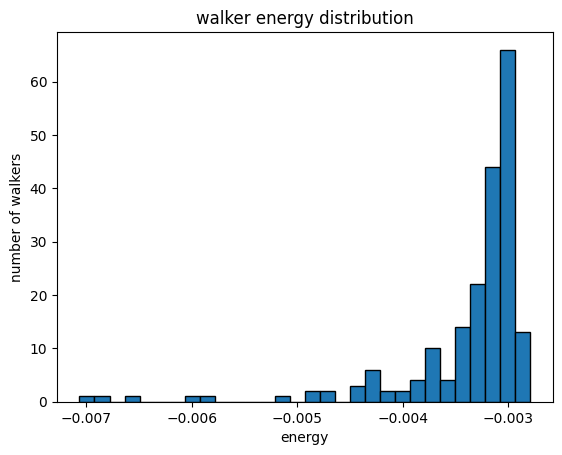

the standard devrivation is 0.0006620565172634703


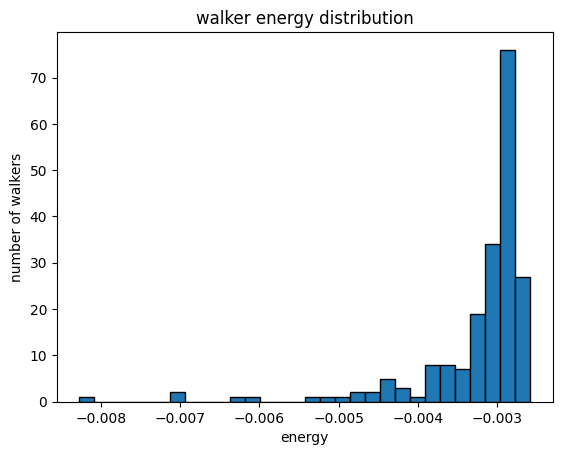

the standard devrivation is 0.0007921671880705843


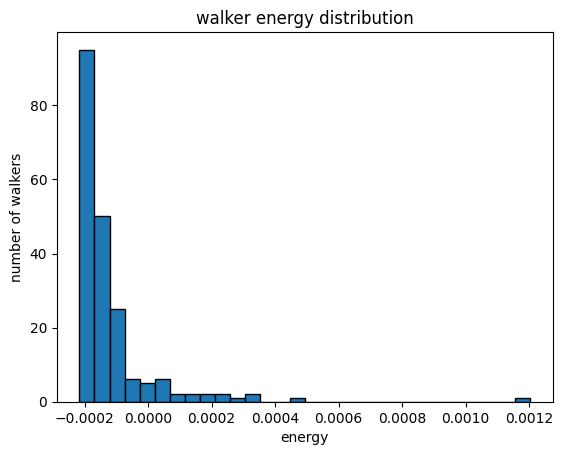

iteration 5
random field [-0.99208421 -0.09918676]
the standard devrivation is 0.00014378817533353466
correlated sampling afqmc energy difference is:  -0.023870738698664858


In [58]:
n_iter += 1

prop_data1,prop_data2,fields = cs_block_scan(prop_data1,ham_data1,prop1,trial1,wave_data1,prop_data2,ham_data2,prop2,trial2,wave_data2)
energy_samples1 = en_samples(prop_data1,ham_data1,prop1,trial1,wave_data1)
energy_samples2 = en_samples(prop_data2,ham_data2,prop2,trial2,wave_data2)
norm_weight1 = prop_data1["weights"]/jnp.sum(prop_data1["weights"])
norm_weight2 = prop_data2["weights"]/jnp.sum(prop_data2["weights"])
weight_walker_en1 = energy_samples1*norm_weight1
weight_walker_en2 = energy_samples2*norm_weight2
weight_walker_en_diff = weight_walker_en1 - weight_walker_en2

from matplotlib import pyplot as plt

plt.hist(weight_walker_en1, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()
print(f'the standard devrivation is {weight_walker_en1.std()}')

plt.hist(weight_walker_en2, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()
print(f'the standard devrivation is {weight_walker_en2.std()}')

plt.hist(weight_walker_en_diff, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()

print(f'iteration {n_iter}')
print(f'random field {fields[0,0]}')
print(f'the standard devrivation is {weight_walker_en_diff.std()}')

print('correlated sampling afqmc energy difference is: ',sum(weight_walker_en_diff))

In [15]:
ham_data1, ham1, prop1, trial1, wave_data1, sampler1, observable1, options1, MPI \
    = mpi_jax._prep_afqmc(options1,mo_file=mo_file1,amp_file=amp_file1,chol_file=chol_file1)
ham_data2, ham2, prop2, trial2, wave_data2, sampler2, observable2, options2, MPI \
    = mpi_jax._prep_afqmc(options2,mo_file=mo_file2,amp_file=amp_file2,chol_file=chol_file2)

prop_data1, ham_data1 = init_prop(ham_data1, ham1, prop1, trial1, wave_data1, options1, MPI)
prop_data2, ham_data2 = init_prop(ham_data2, ham2, prop2, trial2, wave_data2, options2, MPI)

n_iter = 0

# Number of MPI ranks: 1
#
# norb: 2
# nelec: (1, 1)
#
# dt: 0.003
# n_eql: 8
# n_ene_blocks: 1
# n_sr_blocks: 10
# n_blocks: 400
# n_walkers: 200
# seed: 98
# walker_type: rhf
# trial: rhf
# n_prop_steps: 50
# orbital_rotation: True
# do_sr: True
# symmetry: False
# save_walkers: False
# ene0: 0.0
# free_projection: False
# n_batch: 1
# LNO: False
# orbE: 0
# maxError: 0.001
#
# Number of MPI ranks: 1
#
# norb: 2
# nelec: (1, 1)
#
# dt: 0.003
# n_eql: 8
# n_ene_blocks: 1
# n_sr_blocks: 10
# n_blocks: 400
# n_walkers: 200
# seed: 2
# walker_type: rhf
# trial: rhf
# n_prop_steps: 50
# orbital_rotation: True
# do_sr: True
# symmetry: False
# save_walkers: False
# ene0: 0.0
# free_projection: False
# n_batch: 1
# LNO: False
# orbE: 0
# maxError: 0.001
#
# initial energy: -7.935400855e-01
# initial energy: -1.935384558e-01


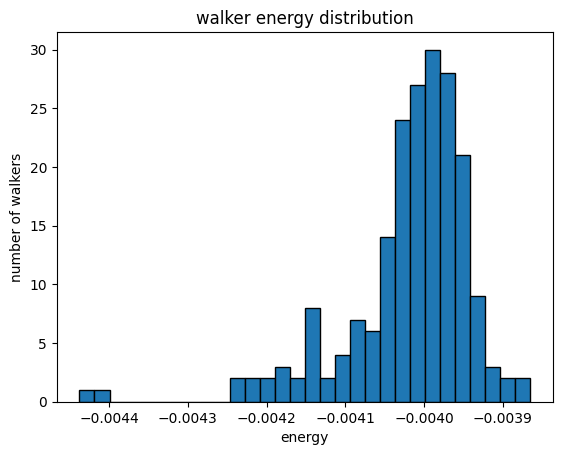

the standard devrivation is 8.038138546534291e-05


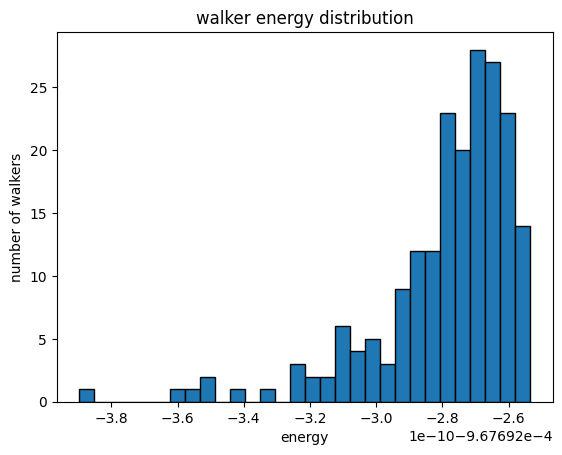

the standard devrivation is 2.141953907975091e-11


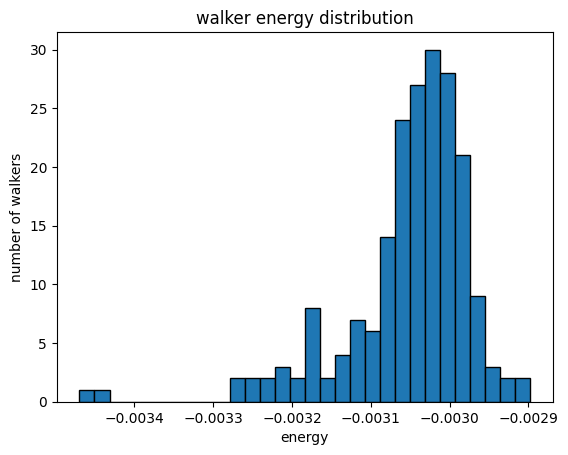

iteration 1
fields1[-1.46832121  0.39105561  0.51450083 -0.34597995 -0.69041112  0.23772648
 -0.64337748 -1.93961613 -0.31344856 -1.16002994  0.08314578  0.88856035
 -0.64645748  0.75104184 -1.46330852  1.03683873  0.94798998  0.89536052] fields2[ 0.17865393  1.19280841 -0.31817908 -0.2491338   0.6857368   0.59286231
 -0.26914549  1.10218591 -0.71243973  0.67075652  1.36134829 -0.50084708
 -1.7353806   1.6426222  -0.87677645 -0.53924213 -1.00262215  0.6185183 ]
the standard devrivation is 8.038138697755702e-05
uncorrelated sampling afqmc energy difference is:  -0.6102396982048247


In [16]:
n_iter += 1

prop_data1,prop_data2,fields1,fields2 = ucs_block_scan(prop_data1,ham_data1,prop1,trial1,wave_data1,prop_data2,ham_data2,prop2,trial2,wave_data2)
energy_samples1 = en_samples(prop_data1,ham_data1,prop1,trial1,wave_data1)
energy_samples2 = en_samples(prop_data2,ham_data2,prop2,trial2,wave_data2)
norm_weight1 = prop_data1["weights"]/jnp.sum(prop_data1["weights"])
norm_weight2 = prop_data2["weights"]/jnp.sum(prop_data2["weights"])
weight_walker_en1 = energy_samples1*norm_weight1
weight_walker_en2 = energy_samples2*norm_weight2
weight_walker_en_diff = weight_walker_en1 - weight_walker_en2

from matplotlib import pyplot as plt

plt.hist(weight_walker_en1, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()
print(f'the standard devrivation is {weight_walker_en1.std()}')

plt.hist(weight_walker_en2, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()
print(f'the standard devrivation is {weight_walker_en2.std()}')

plt.hist(weight_walker_en_diff, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()

print(f'iteration {n_iter}')
print(f'fields1{fields1[0,0]} fields2{fields2[0,0]}')
print(f'the standard devrivation is {weight_walker_en_diff.std()}')

print('uncorrelated sampling afqmc energy difference is: ',sum(weight_walker_en_diff))

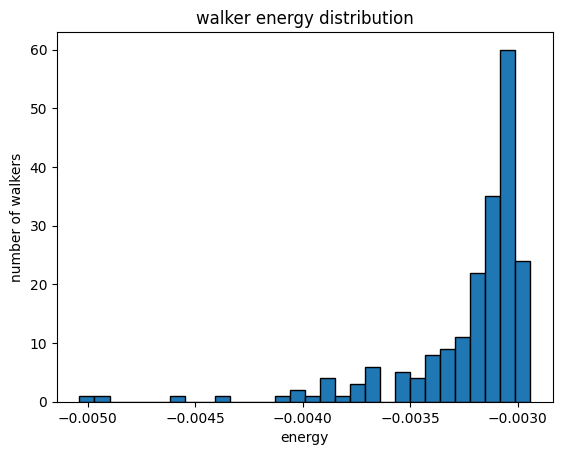

the standard devrivation is 0.00032380619312427547


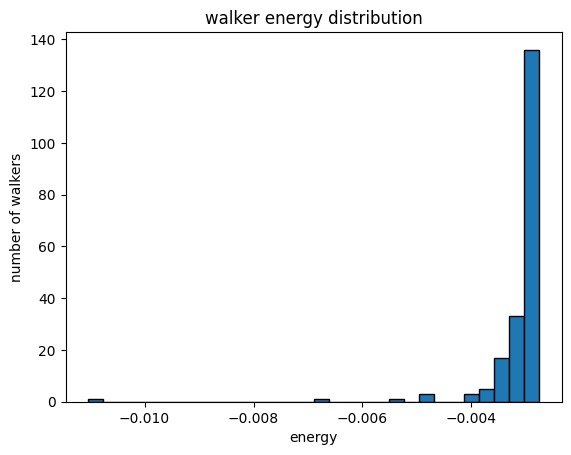

the standard devrivation is 0.0007171553359217676


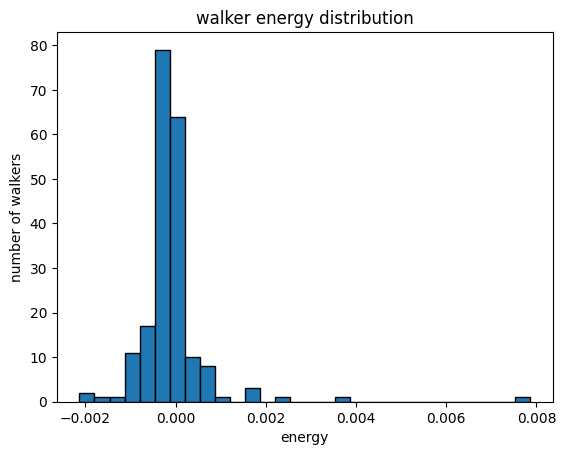

iteration 2
fields1[-1.62529483  1.58623192] fields2[-0.01665687 -1.24740824]
the standard devrivation is 0.0008069417194524573
uncorrelated sampling afqmc energy difference is:  -0.020710705133817772


In [69]:
n_iter += 1

prop_data1,prop_data2,fields1,fields2 = ucs_block_scan(prop_data1,ham_data1,prop1,trial1,wave_data1,prop_data2,ham_data2,prop2,trial2,wave_data2)
energy_samples1 = en_samples(prop_data1,ham_data1,prop1,trial1,wave_data1)
energy_samples2 = en_samples(prop_data2,ham_data2,prop2,trial2,wave_data2)
norm_weight1 = prop_data1["weights"]/jnp.sum(prop_data1["weights"])
norm_weight2 = prop_data2["weights"]/jnp.sum(prop_data2["weights"])
weight_walker_en1 = energy_samples1*norm_weight1
weight_walker_en2 = energy_samples2*norm_weight2
weight_walker_en_diff = weight_walker_en1 - weight_walker_en2

from matplotlib import pyplot as plt

plt.hist(weight_walker_en1, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()
print(f'the standard devrivation is {weight_walker_en1.std()}')

plt.hist(weight_walker_en2, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()
print(f'the standard devrivation is {weight_walker_en2.std()}')

plt.hist(weight_walker_en_diff, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()

print(f'iteration {n_iter}')
print(f'fields1{fields1[0,0]} fields2{fields2[0,0]}')
print(f'the standard devrivation is {weight_walker_en_diff.std()}')

print('uncorrelated sampling afqmc energy difference is: ',sum(weight_walker_en_diff))

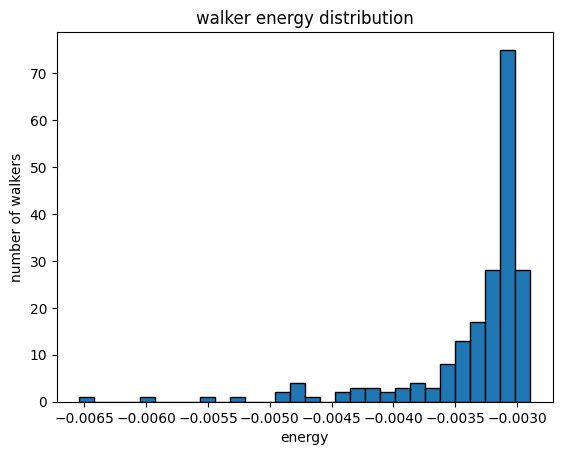

the standard devrivation is 0.0005541468068184896


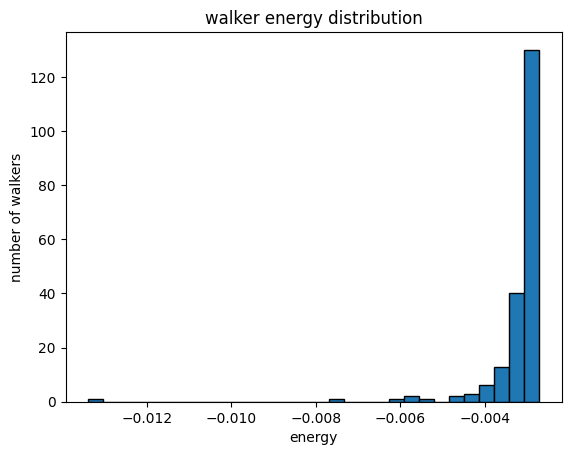

the standard devrivation is 0.0009393449178008721


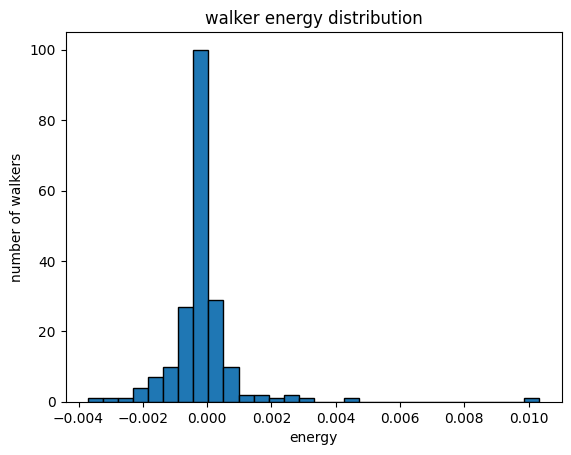

iteration 3
fields1[ 0.18025531 -0.87749889] fields2[0.59849943 0.21236912]
the standard devrivation is 0.0011260066643557563
uncorrelated sampling afqmc energy difference is:  -0.03017143040074331


In [70]:
n_iter += 1

prop_data1,prop_data2,fields1,fields2 = ucs_block_scan(prop_data1,ham_data1,prop1,trial1,wave_data1,prop_data2,ham_data2,prop2,trial2,wave_data2)
energy_samples1 = en_samples(prop_data1,ham_data1,prop1,trial1,wave_data1)
energy_samples2 = en_samples(prop_data2,ham_data2,prop2,trial2,wave_data2)
norm_weight1 = prop_data1["weights"]/jnp.sum(prop_data1["weights"])
norm_weight2 = prop_data2["weights"]/jnp.sum(prop_data2["weights"])
weight_walker_en1 = energy_samples1*norm_weight1
weight_walker_en2 = energy_samples2*norm_weight2
weight_walker_en_diff = weight_walker_en1 - weight_walker_en2

from matplotlib import pyplot as plt

plt.hist(weight_walker_en1, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()
print(f'the standard devrivation is {weight_walker_en1.std()}')

plt.hist(weight_walker_en2, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()
print(f'the standard devrivation is {weight_walker_en2.std()}')

plt.hist(weight_walker_en_diff, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()

print(f'iteration {n_iter}')
print(f'fields1{fields1[0,0]} fields2{fields2[0,0]}')
print(f'the standard devrivation is {weight_walker_en_diff.std()}')

print('uncorrelated sampling afqmc energy difference is: ',sum(weight_walker_en_diff))

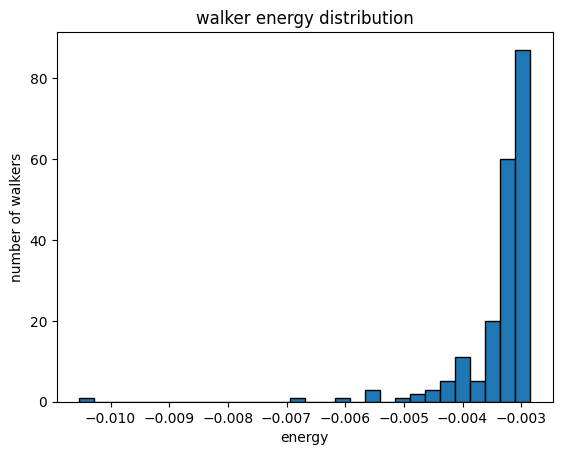

the standard devrivation is 0.0007717969975632735


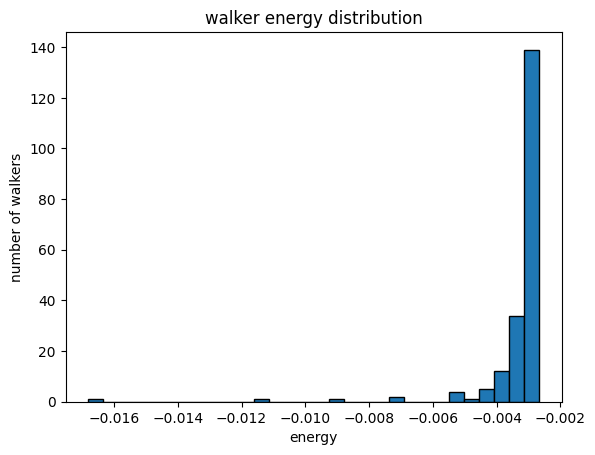

the standard devrivation is 0.001345974181784937


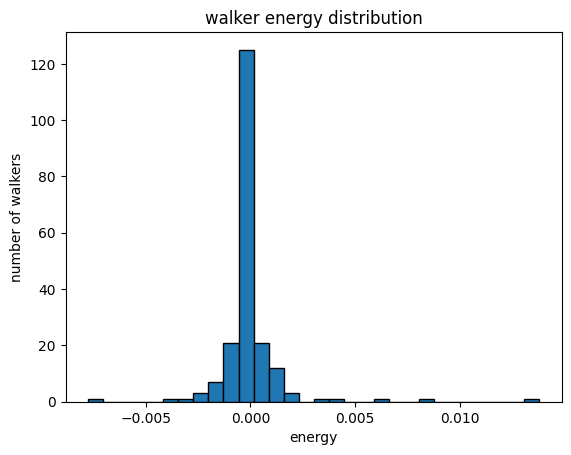

iteration 4
fields1[-0.67848295 -0.26216265] fields2[0.59213884 1.08885427]
the standard devrivation is 0.0015937183610665658
uncorrelated sampling afqmc energy difference is:  -0.017764744264985772


In [71]:
n_iter += 1

prop_data1,prop_data2,fields1,fields2 = ucs_block_scan(prop_data1,ham_data1,prop1,trial1,wave_data1,prop_data2,ham_data2,prop2,trial2,wave_data2)
energy_samples1 = en_samples(prop_data1,ham_data1,prop1,trial1,wave_data1)
energy_samples2 = en_samples(prop_data2,ham_data2,prop2,trial2,wave_data2)
norm_weight1 = prop_data1["weights"]/jnp.sum(prop_data1["weights"])
norm_weight2 = prop_data2["weights"]/jnp.sum(prop_data2["weights"])
weight_walker_en1 = energy_samples1*norm_weight1
weight_walker_en2 = energy_samples2*norm_weight2
weight_walker_en_diff = weight_walker_en1 - weight_walker_en2

from matplotlib import pyplot as plt

plt.hist(weight_walker_en1, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()
print(f'the standard devrivation is {weight_walker_en1.std()}')

plt.hist(weight_walker_en2, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()
print(f'the standard devrivation is {weight_walker_en2.std()}')

plt.hist(weight_walker_en_diff, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()

print(f'iteration {n_iter}')
print(f'fields1{fields1[0,0]} fields2{fields2[0,0]}')
print(f'the standard devrivation is {weight_walker_en_diff.std()}')

print('uncorrelated sampling afqmc energy difference is: ',sum(weight_walker_en_diff))

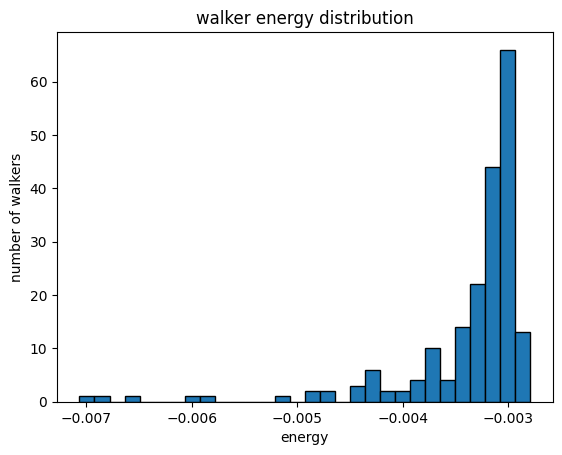

the standard devrivation is 0.0006620565172634703


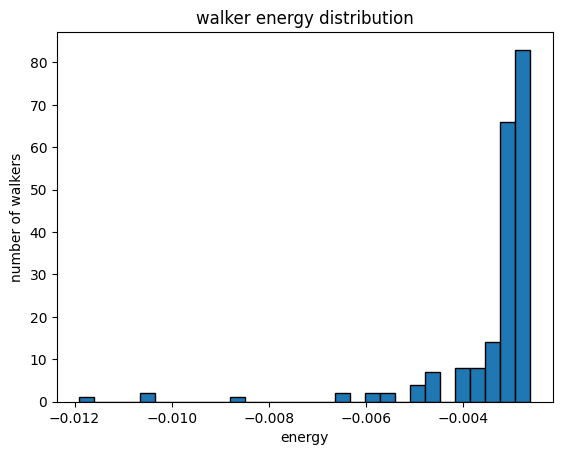

the standard devrivation is 0.0012310852722989924


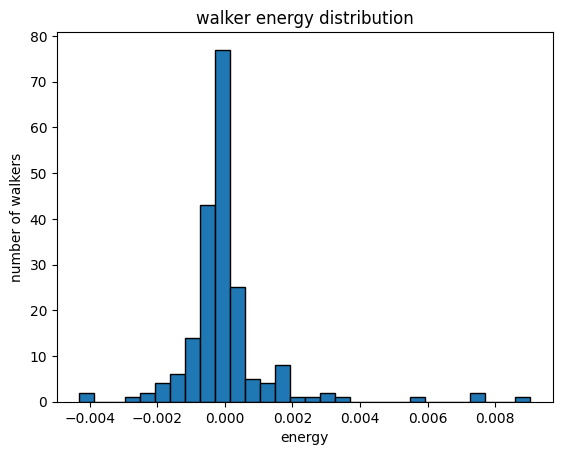

iteration 5
fields1[-0.99208421 -0.09918676] fields2[-1.07398466  0.31624569]
the standard devrivation is 0.0014220246429352806
uncorrelated sampling afqmc energy difference is:  -0.001523774624345177


In [72]:
n_iter += 1

prop_data1,prop_data2,fields1,fields2 = ucs_block_scan(prop_data1,ham_data1,prop1,trial1,wave_data1,prop_data2,ham_data2,prop2,trial2,wave_data2)
energy_samples1 = en_samples(prop_data1,ham_data1,prop1,trial1,wave_data1)
energy_samples2 = en_samples(prop_data2,ham_data2,prop2,trial2,wave_data2)
norm_weight1 = prop_data1["weights"]/jnp.sum(prop_data1["weights"])
norm_weight2 = prop_data2["weights"]/jnp.sum(prop_data2["weights"])
weight_walker_en1 = energy_samples1*norm_weight1
weight_walker_en2 = energy_samples2*norm_weight2
weight_walker_en_diff = weight_walker_en1 - weight_walker_en2

from matplotlib import pyplot as plt

plt.hist(weight_walker_en1, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()
print(f'the standard devrivation is {weight_walker_en1.std()}')

plt.hist(weight_walker_en2, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()
print(f'the standard devrivation is {weight_walker_en2.std()}')

plt.hist(weight_walker_en_diff, bins=30, edgecolor='black')  
plt.xlabel('energy')
plt.ylabel('number of walkers')
plt.title('walker energy distribution')
plt.show()

print(f'iteration {n_iter}')
print(f'fields1{fields1[0,0]} fields2{fields2[0,0]}')
print(f'the standard devrivation is {weight_walker_en_diff.std()}')

print('uncorrelated sampling afqmc energy difference is: ',sum(weight_walker_en_diff))

In [39]:
ham_data1, ham1, prop1, trial1, wave_data1, sampler1, observable1, options1, MPI \
    = mpi_jax._prep_afqmc(options1,mo_file=mo_file1,amp_file=amp_file1,chol_file=chol_file1)
ham_data2, ham2, prop2, trial2, wave_data2, sampler2, observable2, options2, MPI \
    = mpi_jax._prep_afqmc(options2,mo_file=mo_file2,amp_file=amp_file2,chol_file=chol_file2)

prop_data1, ham_data1 = init_prop(ham_data1, ham1, prop1, trial1, wave_data1, options1, MPI)
prop_data2, ham_data2 = init_prop(ham_data2, ham2, prop2, trial2, wave_data2, options2, MPI)

steps = np.arange(0, 10, 1)
weight_cwalker_en1 = [0]*10
weight_cwalker_en2 = [0]*10
cwalker_en_diff = [0]*10
weight_cwalker_en_diff_err = [0]*10
for n in steps:
    prop_data1,prop_data2,fields = cs_block_scan(prop_data1,ham_data1,prop1,trial1,wave_data1,prop_data2,ham_data2,prop2,trial2,wave_data2)
    energy_samples1 = en_samples(prop_data1,ham_data1,prop1,trial1,wave_data1)
    energy_samples2 = en_samples(prop_data2,ham_data2,prop2,trial2,wave_data2)
    norm_weight1 = prop_data1["weights"]/jnp.sum(prop_data1["weights"])
    norm_weight2 = prop_data2["weights"]/jnp.sum(prop_data2["weights"])
    weight_cwalker_en1 = energy_samples1*norm_weight1
    weight_cwalker_en2 = energy_samples2*norm_weight2
    weight_cwalker_en_diff = weight_cwalker_en1 - weight_cwalker_en2
    weight_cwalker_en_diff_err[n] = weight_cwalker_en_diff.std()
    cwalker_en_diff[n] = sum(weight_cwalker_en_diff)


# Number of MPI ranks: 1
#
# norb: 2
# nelec: (1, 1)
#
# dt: 0.005
# n_eql: 4
# n_ene_blocks: 1
# n_sr_blocks: 10
# n_blocks: 200
# n_walkers: 50
# seed: 98
# walker_type: rhf
# trial: rhf
# n_prop_steps: 50
# orbital_rotation: True
# do_sr: True
# symmetry: False
# save_walkers: False
# ene0: 0.0
# free_projection: False
# n_batch: 1
# LNO: False
# orbE: 0
# maxError: 0.001
#
# Number of MPI ranks: 1
#
# norb: 2
# nelec: (1, 1)
#
# dt: 0.005
# n_eql: 4
# n_ene_blocks: 1
# n_sr_blocks: 10
# n_blocks: 200
# n_walkers: 50
# seed: 2
# walker_type: rhf
# trial: rhf
# n_prop_steps: 50
# orbital_rotation: True
# do_sr: True
# symmetry: False
# save_walkers: False
# ene0: 0.0
# free_projection: False
# n_batch: 1
# LNO: False
# orbE: 0
# maxError: 0.001
#
# initial energy: -6.244981444e-01
# initial energy: -6.080111131e-01


In [40]:
ham_data1, ham1, prop1, trial1, wave_data1, sampler1, observable1, options1, MPI \
    = mpi_jax._prep_afqmc(options1,mo_file=mo_file1,amp_file=amp_file1,chol_file=chol_file1)
ham_data2, ham2, prop2, trial2, wave_data2, sampler2, observable2, options2, MPI \
    = mpi_jax._prep_afqmc(options2,mo_file=mo_file2,amp_file=amp_file2,chol_file=chol_file2)

prop_data1, ham_data1 = init_prop(ham_data1, ham1, prop1, trial1, wave_data1, options1, MPI)
prop_data2, ham_data2 = init_prop(ham_data2, ham2, prop2, trial2, wave_data2, options2, MPI)

steps = np.arange(0, 10, 1)
#weight_cwalker_en1 = [0]*10
#weight_cwalker_en2 = [0]*10
walker_en_diff = [0]*10
weight_walker_en_diff_err = [0]*10
for n in steps:
    prop_data1,prop_data2,_,_ = ucs_block_scan(prop_data1,ham_data1,prop1,trial1,wave_data1,prop_data2,ham_data2,prop2,trial2,wave_data2)
    energy_samples1 = en_samples(prop_data1,ham_data1,prop1,trial1,wave_data1)
    energy_samples2 = en_samples(prop_data2,ham_data2,prop2,trial2,wave_data2)
    norm_weight1 = prop_data1["weights"]/jnp.sum(prop_data1["weights"])
    norm_weight2 = prop_data2["weights"]/jnp.sum(prop_data2["weights"])
    weight_walker_en1 = energy_samples1*norm_weight1
    weight_walker_en2 = energy_samples2*norm_weight2
    weight_walker_en_diff = weight_walker_en1 - weight_walker_en2
    weight_walker_en_diff_err[n] = weight_walker_en_diff.std()
    walker_en_diff[n] = sum(weight_walker_en_diff)

# Number of MPI ranks: 1
#
# norb: 2
# nelec: (1, 1)
#
# dt: 0.005
# n_eql: 4
# n_ene_blocks: 1
# n_sr_blocks: 10
# n_blocks: 200
# n_walkers: 50
# seed: 98
# walker_type: rhf
# trial: rhf
# n_prop_steps: 50
# orbital_rotation: True
# do_sr: True
# symmetry: False
# save_walkers: False
# ene0: 0.0
# free_projection: False
# n_batch: 1
# LNO: False
# orbE: 0
# maxError: 0.001
#
# Number of MPI ranks: 1
#
# norb: 2
# nelec: (1, 1)
#
# dt: 0.005
# n_eql: 4
# n_ene_blocks: 1
# n_sr_blocks: 10
# n_blocks: 200
# n_walkers: 50
# seed: 2
# walker_type: rhf
# trial: rhf
# n_prop_steps: 50
# orbital_rotation: True
# do_sr: True
# symmetry: False
# save_walkers: False
# ene0: 0.0
# free_projection: False
# n_batch: 1
# LNO: False
# orbE: 0
# maxError: 0.001
#
# initial energy: -6.244981444e-01
# initial energy: -6.080111131e-01


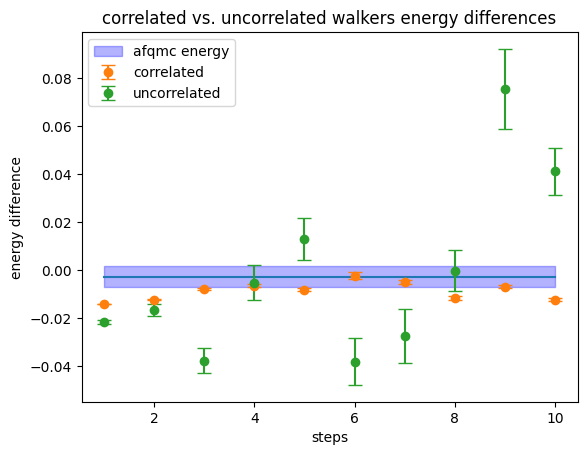

In [42]:
x_steps = np.linspace(1,10,100)
afqmc_en = np.array([afqmc_en_diff]*len(x_steps))
afqmc_lw = afqmc_en-afqmc_en_diff_err
afqmc_up = afqmc_en+afqmc_en_diff_err
plt.plot(x_steps,afqmc_en)
plt.fill_between(x_steps, afqmc_lw, afqmc_up, color='blue', alpha=0.3, label='afqmc energy')
plt.errorbar(steps+1,cwalker_en_diff,yerr=weight_cwalker_en_diff_err, fmt='o', capsize=5,label='correlated')
plt.errorbar(steps+1,walker_en_diff,yerr=weight_walker_en_diff_err, fmt='o', capsize=5,label='uncorrelated')
plt.xlabel('steps')
plt.ylabel('energy difference')
plt.title('correlated vs. uncorrelated walkers energy differences')
plt.legend()
plt.show()